# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys3 import weatherkey

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weatherkey}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | omboue
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | juifang
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | muros
Processing Record 15 of Set 1 | oeiras
Processing Record 16 of Set 1 | khani
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kinsale
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | rundu
Processing Record 22 of Set 1 | saldanha
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,67.95,84,20,4.61,BR,1667711989
1,saint anthony,45.0205,-93.2180,38.19,91,0,8.05,US,1667712056
2,albany,42.6001,-73.9662,66.67,79,97,4.00,US,1667711965
3,lebu,-37.6167,-73.6500,49.59,92,5,6.24,CL,1667711866
4,omboue,-1.5746,9.2618,74.07,96,100,2.28,GA,1667712056


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila velha,-20.3297,-40.2925,67.95,84,20,4.61,BR,1667711989
1,saint anthony,45.0205,-93.2180,38.19,91,0,8.05,US,1667712056
2,albany,42.6001,-73.9662,66.67,79,97,4.00,US,1667711965
3,lebu,-37.6167,-73.6500,49.59,92,5,6.24,CL,1667711866
4,omboue,-1.5746,9.2618,74.07,96,100,2.28,GA,1667712056


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

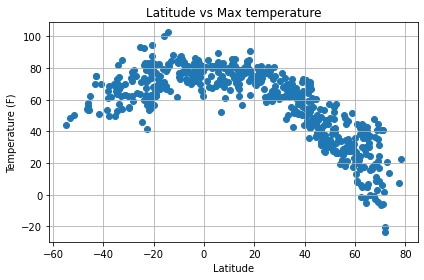

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.title('Latitude vs Max temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.tight_layout()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

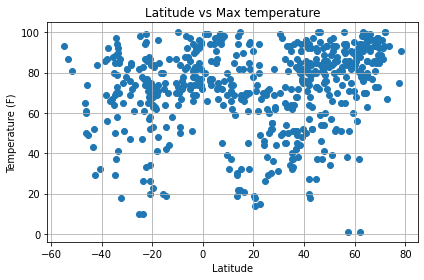

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.title('Latitude vs Max temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

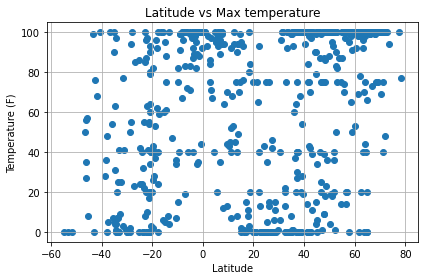

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.title('Latitude vs Max temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

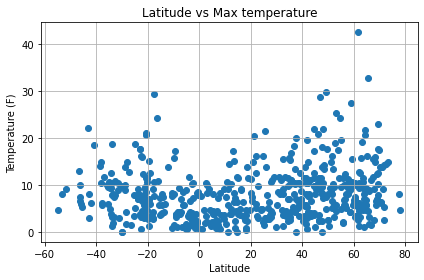

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.title('Latitude vs Max temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
print({len(northern_hemi_df)})
northern_hemi_df.head()

{371}


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint anthony,45.0205,-93.2180,38.19,91,0,8.05,US,1667712056
2,albany,42.6001,-73.9662,66.67,79,97,4.00,US,1667711965
5,hilo,19.7297,-155.0900,74.25,91,0,4.61,US,1667712056
7,thompson,55.7435,-97.8558,26.76,100,100,11.50,CA,1667712057
8,jamestown,42.0970,-79.2353,71.24,64,75,19.57,US,1667712058


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
print({len(southern_hemi_df)})
southern_hemi_df.head()


{182}


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila velha,-20.3297,-40.2925,67.95,84,20,4.61,BR,1667711989
3,lebu,-37.6167,-73.6500,49.59,92,5,6.24,CL,1667711866
4,omboue,-1.5746,9.2618,74.07,96,100,2.28,GA,1667712056
6,rocha,-34.4833,-54.3333,52.79,97,1,4.79,UY,1667712057
13,oeiras,-7.0253,-42.1311,73.27,88,83,4.14,BR,1667712060


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


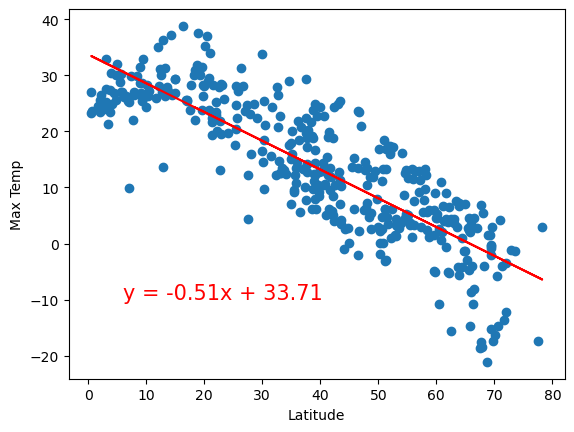

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.4121057168607245


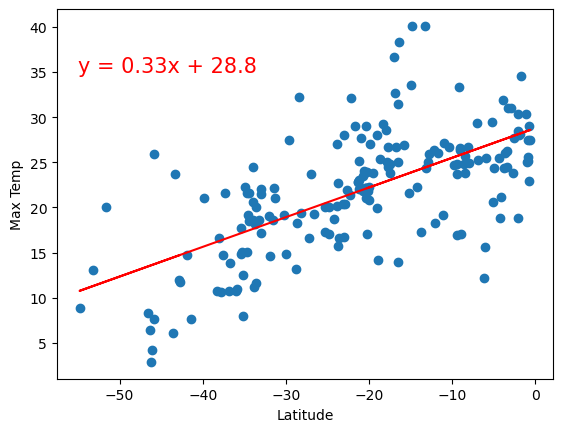

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


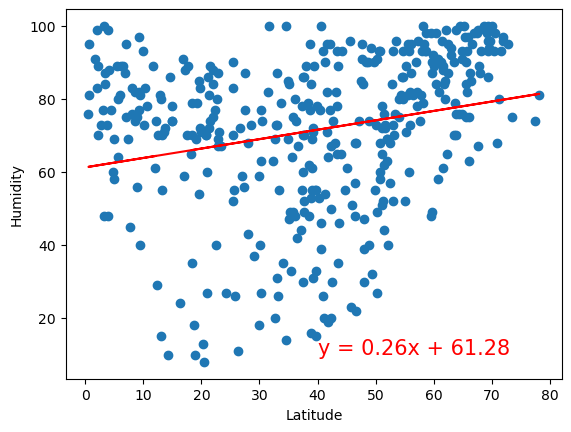

In [17]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.0002808747046324607


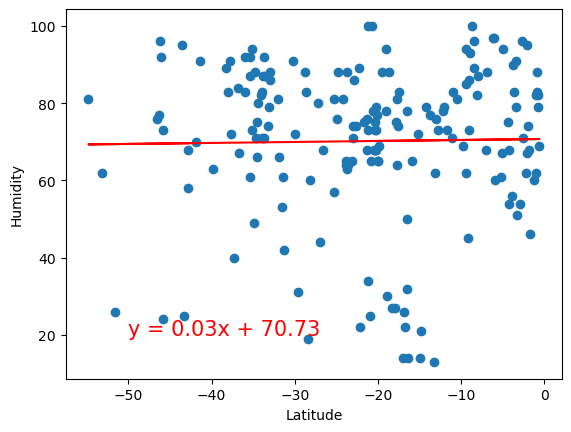

In [18]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


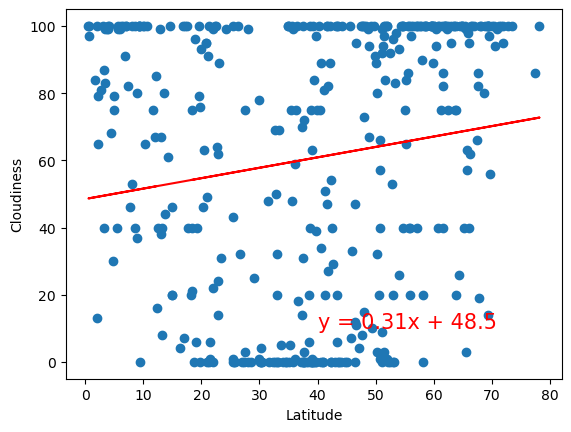

In [19]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.02056735429994368


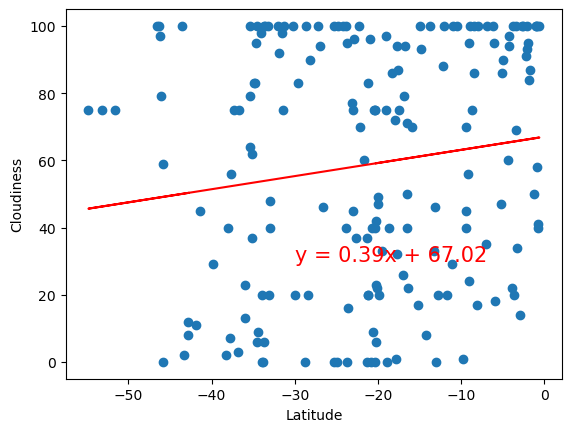

In [20]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


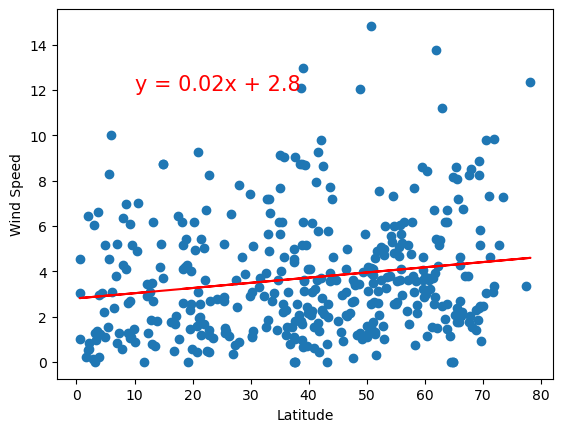

In [21]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.062239040700515696


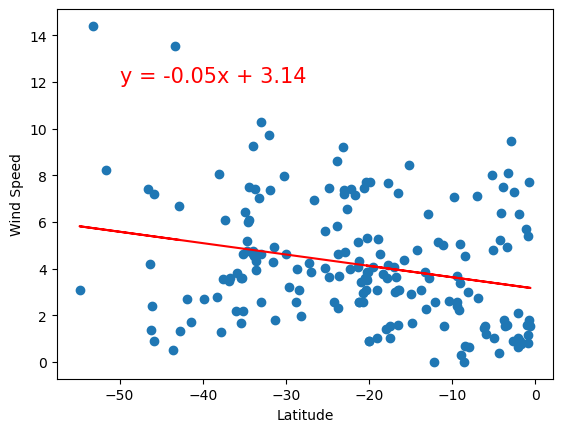

In [22]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE